# Intelligent Realestate Investing 

In [19]:
import pandas as pd
import requests
import json                                                        #helps manipulate json
import csv                                                         # helps with csv files
from bs4 import BeautifulSoup                                      # to scrape web
!pip install pyzillow                                              # zestimate api
from pyzillow.pyzillow import ZillowWrapper, GetDeepSearchResults  # zestimate api
from selenium import webdriver                                     # to scrape web
from selenium.webdriver.support.ui import WebDriverWait            # to scrape web
from selenium.webdriver.support import expected_conditions as EC   # to scrape web
import os        # to set directory
import shutil
!pip install folium
import folium    # map visualization

# for web driver down below
email = 'blaketindol@gmail.com'
passwordz = 'Your Password' 



#https://www.melissa.com/v2/lookups/addresssearch/?number=&street=Carino+Ct&city=Paw+Paw&state=MI&zip=49079-9661&freeForm=
#https://rapidapi.com/apidojo/api/realtor

You should consider upgrading via the 'c:\users\btindol\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\btindol\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [3]:
# Function using the realator api to grabe houses that are for sale!!

def api_property_list_for_sale(city, state, prop_type, limit=200):

    url = "https://realtor.p.rapidapi.com/properties/v2/list-for-sale"

    querystring = {"city":city,"limit":"200","offset":"0","state_code":state,"sort":"relevance","prop_type":prop_type}

    headers = {
        'x-rapidapi-key': "3098984b99msh9a120a8ade10e53p1ebdd1jsn7703d6e155d0",
        'x-rapidapi-host': "realtor.p.rapidapi.com"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json() # json format

In [4]:
# Once pick state and home type throw it through this function to get the proper readable format
def process_list_for_sale_response(response_json):
    """
    Process the list for sale API response.

    Convert each listing to a dataframe, append to a list, and concatenate to one dataframe.

    Parameters
    ----------
    @response_json [dictionary]: API response for list for sale

    Returns
    -------
    [dataframe] Dataframe of all list for sale responses

    """

    # empty dataframe
    dataframe_list = []

    # iterate through each for sale listing
    for l in response_json['properties']:

        # convert each listing to dataframe
        _temp_df = pd.DataFrame.from_dict(l, orient='index').T

        # append to dataframe list for all listings
        dataframe_list.append(_temp_df)

    # concatenate all dataframes, for missing col values enter null value
    return pd.concat(dataframe_list, axis=0, ignore_index=True, sort=False)

In [21]:
# Take api call and make the data cleaner into data frame format
def make_house_data_clean(df_properties_for_sale_raw):
    # transfer into dataframe
    df_properties_for_sale_raw = pd.DataFrame(df_properties_for_sale_raw)
    
    # make this int column non interable into series then
    df_pol_ps = df_properties_for_sale_raw['lot_size'].apply(pd.Series)
    
    # then make it into column 
    df_properties_for_sale_raw['size'] = df_pol_ps['size']
    
    # pick out only the columns we want  and rename them 
    list2 = ['property_id', 'listing_id','address','prop_status','price', 'baths_full', 'baths', 'beds', 
             'building_size','last_update', 'lot_size','baths_half', 'size']
    result = df_properties_for_sale_raw[list2]
    result.columns = ['property_id', 'listing_id','address','prop_status','price', 'baths_full', 'baths',
                      'beds', 'building_size','last_update', 'lot_size','baths_half', 'lot_size']
    return result

In [6]:
def get_address_and_buildingsize(result):
    address = pd.json_normalize(result['address'])
    building_size = pd.json_normalize(result['building_size'].dropna())
    building_size.columns =['building_size','building_inside_units']
    result2 = pd.concat([address,building_size], axis=1)
    result3 = pd.concat([df,result2], axis=1)
    return result3


In [7]:
# Variables 
city = "cape coral"
state = "FL"
prop_type = "single_family"

property_list_for_sale_response = api_property_list_for_sale(
                                                             city=city, 
                                                             state=state, 
                                                             prop_type=prop_type,
                                                             limit=200)

In [22]:
df_properties_for_sale_raw = process_list_for_sale_response(response_json=property_list_for_sale_response)
df = make_house_data_clean(df_properties_for_sale_raw)

In [10]:
df['price'].max() # 1949000
df['price'].min() # 34900
df['price'].mean() # 404515.635


492387.24

# Vizualize the points on a map

In [12]:
# expand the address and building size columns 
var2 = get_address_and_buildingsize(df)
var2

,property_id,listing_id,address,prop_status,price,baths_full,baths,beds,building_size,last_update,...,county,fips_code,county_needed_for_uniq,lat,lon,neighborhood_name,time_zone,is_approximate,building_size,building_inside_units
0,M6996370296,2932507847,"{'city': 'Cape Coral', 'line': '4337 SW 1st Pl...",for_sale,439000,2,2,3,"{'size': 1952, 'units': 'sqft'}",2021-08-02T07:18:55Z,...,Lee,12071,False,26.570799,-81.976787,Pelican,NaN,NaN,1952.0,sqft
1,M6142782511,2932503820,"{'city': 'Cape Coral', 'line': '2122 SW 52nd S...",for_sale,599000,2,3,3,"{'size': 2474, 'units': 'sqft'}",2021-08-01T22:52:04Z,...,Lee,12071,False,26.555158,-82.018903,Pelican,NaN,NaN,2474.0,sqft
2,M6066152361,2932503672,"{'city': 'Cape Coral', 'line': '122 SE 10th Te...",for_sale,459000,2,2,3,"{'size': 2196, 'units': 'sqft'}",2021-08-01T21:50:38Z,...,Lee,12071,False,26.633142,-81.972717,Hancock,NaN,NaN,2196.0,sqft
3,M5134366107,2932503348,"{'city': 'Cape Coral', 'line': '4102 Palm Tree...",for_sale,239900,2,2,2,"{'size': 1500, 'units': 'sqft'}",2021-08-01T21:15:44Z,...,Lee,12071,False,26.575923,-81.966890,Caloosahatchee,NaN,NaN,1500.0,sqft
4,M6087382576,2932502197,"{'city': 'Cape Coral', 'line': '2044 NE 20th T...",for_sale,224900,2,2,3,"{'size': 1800, 'units': 'sqft'}",2021-08-01T19:27:26Z,...,Lee,12071,False,26.690524,-81.931518,Diplomat,America/New_York,NaN,1800.0,sqft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,M5606238354,2932179956,"{'city': 'Cape Coral', 'line': '2013 NE 19th T...",for_sale,269000,2,2,3,"{'size': 1350, 'units': 'sqft'}",2021-07-27T14:26:56Z,...,Lee,12071,False,26.690300,-81.933495,Diplomat,America/New_York,NaN,2374.0,sqft
196,M5988491574,2932178590,"{'city': 'Cape Coral', 'line': '2906 NW 11th S...",for_sale,478900,2,3,3,"{'size': 2374, 'units': 'sqft'}",2021-08-01T23:04:51Z,...,Lee,12071,False,26.672454,-82.034916,Burnt Store,NaN,NaN,1718.0,sqft
197,M6429443512,2932154313,"{'city': 'Cape Coral', 'line': '313 NW 16th Pl...",for_sale,279700,2,2,3,"{'size': 1718, 'units': 'sqft'}",2021-07-26T15:41:09Z,...,Lee,12071,False,26.658348,-82.007905,Mariner,NaN,NaN,2182.0,sqft
198,M5891264730,2932152767,"{'city': 'Cape Coral', 'line': '2918 SW 38th T...",for_sale,750000,3,3,3,"{'size': 2182, 'units': 'sqft'}",2021-07-24T13:35:36Z,...,Lee,12071,False,26.580697,-82.035870,Pelican,NaN,NaN,2470.0,sqft


In [23]:
lon = list(var2["lon"]) # make longitude adn lattitude into list
lat = list(var2["lat"])
address = list(var2['line'])
price = list(var2["price"]) # This normally needs to be a string!!!!!!!!!

# Color changing function 
def color_producer(prices):
    if prices <= 20000:
        return 'lightgreen'
    elif 20001 <= prices < 75000:
        return 'green'
    elif 75001 <= prices < 100000:
        return 'darkgreen'
    elif 100001 <= prices < 200000:
        return 'lightblue'
    elif 200001 <= prices < 250000:
        return 'blue'
    elif 250001 <= prices < 300000:
        return 'darkblue'
    elif 300001 <= prices < 350000:
        return 'orange'
    elif 350001 <= prices < 400000:
        return 'lightred'
    else: 
        return 'red'
    
# initialize map
map = folium.Map(location = [38.28,-99.09],zoom_start = 6,TileLayer="Mapbox Bright")
#make map fg variable 
fg = folium.FeatureGroup(name="My map")

for lt, ln, pr , adr in zip(lat,lon,price,address):
        fg.add_child(folium.Marker(location =[lt,ln],popup=str(pr) + " dollars" + str(adr) ,
                                   icon =folium.Icon(color=color_producer(pr))))

map.add_child(fg)
map.save("Map10.html")
map

In [14]:
street = var2['line'][1] 
street=street[4:]
street = street.strip()
street

'SW 52nd St'

# Loop through dataframe street name using selenium and Melisa.com

In [16]:
for i in range(0,len(var2)): 
    try:
        street = var2['line'][i]                                 # get the street name
        result=street[4:]
        result =result.strip()                                   # remove leading and trailing spaces
        street = result.replace(" ", "+")                        # replace spances with plus ( thats how the website likes it)

        # Get state name then
        state = var2['state'][i]
        state = us_state_abbrev[state]   # convert full name to abbriviation

        # get postal code.. 
        zipcode = var2['postal_code'][i]

        # get city and then replace the space with plus
        city = var2['city'][i]
        city = city.replace(" ", "+")
        print(street + " " + state + " " + zipcode +" " + city) 
    except:
        pass

SW+1st+Pl FL 33914 Cape+Coral
SW+52nd+St FL 33914 Cape+Coral
SE+10th+Ter FL 33990 Cape+Coral
Palm+Tree+Blvd FL 33904 Cape+Coral
NE+20th+Ter FL 33909 Cape+Coral
SW+17th+Pl FL 33991 Cape+Coral
NW+20th+Ter FL 33993 Cape+Coral
NW+5th+St FL 33993 Cape+Coral
NE+13th+Pl FL 33909 Cape+Coral
15th+Pl FL 33991 Cape+Coral
Sharar+Ct FL 33904 Cape+Coral
NW+Juanita+Pl FL 33993 Cape+Coral
Santa+Barbara+Blvd+N FL 33993 Cape+Coral
Yardarm+Ct FL 33914 Cape+Coral
NE+6th+St FL 33909 Cape+Coral
E+11th+Pl FL 33909 Cape+Coral
NW+10th+St FL 33993 Cape+Coral
SE+15th+Ter FL 33990 Cape+Coral
NE+20th+Ct FL 33909 Cape+Coral
SE+21st+St FL 33990 Cape+Coral
SW+35th+Ter FL 33914 Cape+Coral
SW+13th+St FL 33991 Cape+Coral
SE+24th+Pl FL 33904 Cape+Coral
SE+20th+Pl FL 33904 Cape+Coral
SW+36th+Ln FL 33914 Cape+Coral
Bayshore+Dr FL 33904 Cape+Coral
SE+16th+Pl FL 33904 Cape+Coral
NW+8th+Ter FL 33993 Cape+Coral
SE+27th+St FL 33904 Cape+Coral
6+Royal+Tee+Ct FL 33991 Cape+Coral
NE+10th+Pl FL 33909 Cape+Coral
NE+22nd+Pl FL 33909 

In [17]:
link_to_neighbors = 'https://www.melissa.com/v2/lookups/addresssearch/?number=&street={0}&city={1}&state={2}&zip={3}&freeForm='.format(street,city,state,zipcode)
link_to_neighbors

'https://www.melissa.com/v2/lookups/addresssearch/?number=&street=Loreto+Ct&city=Cape+Coral&state=FL&zip=33909&freeForm='

In [30]:
# Loop through all of the columns then get the names you need to make the new url to throw in the selenium code.. 
for i in range(0,len(var2)):   
    try:
        street = var2['line'][i]                                 # get the street name
        #result = ''.join([i for i in street if not i.isdigit()]) # search for digits and replace them when searching for the street
        result=street[4:]
        result =result.strip()                                   # remove leading and trailing spaces
        street = result.replace(" ", "+")                       # replace spances with plus ( thats how the website likes it)

        # Get state name then
        state = var2['state'][i]
        state = us_state_abbrev[state]   # convert full name to abbriviation

        # get postal code.. 
        zipcode = var2['postal_code'][i]

        # get city and then replace the space with plus
        city = var2['city'][i]
        city = city.replace(" ", "+")
        #print(street + " " + state + " " + zipcode +" " + city) VERIFY!!!

        # Get the url for the selenium loop... 
        link_to_neighbors = 'https://www.melissa.com/v2/lookups/addresssearch/?number=&street={0}&city={1}&state={2}&zip={3}&freeForm='.format(street,city,state,zipcode)

        # initiate crome driver
        c = webdriver.ChromeOptions()

        # get the path to the chrome driver 
        driver = webdriver.Chrome(executable_path='C:/Users/btindol/OneDrive - Stryker/ChromeDriver/chromedriver.exe')#,options=c)

        # wait a bit
        driver.implicitly_wait(0.5)

        # use the url that got in above code 
        driver.get(link_to_neighbors) # use the url that was created before... 

        # get past the pop up alert..
        WebDriverWait(driver, 10).until(EC.alert_is_present())

        # click out of it
        driver.switch_to.alert.accept()

        # wait a bit 
        driver.implicitly_wait(3)

        # grab email to input eamil for user name 
        emailfield= driver.find_element_by_id("ctl00_ContentPlaceHolder1_Signin1_txtEmail")

        # grab password to put in pass
        passwordmessagefield = driver.find_element_by_id("ctl00_ContentPlaceHolder1_Signin1_txtPassword")

        # put in email
        emailfield.send_keys(email)

        # put in password
        passwordmessagefield.send_keys(passwordz)

        # submit button 
        submitbutton = driver.find_element_by_id("ctl00_ContentPlaceHolder1_Signin1_btnLogin")
        submitbutton.click() # send click t osubmit

        # get the excel file on the page and download.. 
        excelfile = driver.find_element_by_xpath('//*[@id="content"]/section[3]/div/div/div/span/div/div[3]/input[3]')
        excelfile.click()
    except:
        pass

In [32]:
import os
direct = 'C:\\Users\\btindol\\Downloads\\'

listz = []
listnames = []
for filename in os.listdir('C:\\Users\\btindol\\Downloads'):
    if filename.endswith(".xlsx"):
        #print(filename)
        var = direct +  filename
        print(var)
        #do your operation
        data_df = pd.read_excel(var)#, sheet_name=None)
        listnameorder=data_df['Address'][0]
        listnames.append(listnameorder)
        data_df = pd.DataFrame(data_df)
        listz.append(data_df)
        #os.remove(data_df)
listnames

[]

In [38]:
# matching file names to the addresses.
all_addresses_cape_coral= pd.concat(listz)
all_addresses_cape_coral

,Unnamed: 0,HouseNumber,Street,StreetSuffix,City,State,Zip,StreetName,Address,StateName,Zip4,AddressType,RBDI,Active,Fips,County,ResultCode,MAK
0,0,116,19th,Ter,Cape Coral,FL,33990,NaN,116 SE 19th Ter,Florida,2247.0,Street,Residential,Yes,12071.0,lee,AS01,9586730827
1,1,120,19th,Ter,Cape Coral,FL,33990,NaN,120 SE 19th Ter,Florida,2247.0,Street,Residential,Yes,12071.0,lee,AS01,7995891203
2,2,128,19th,Ter,Cape Coral,FL,33990,NaN,128 SE 19th Ter,Florida,2247.0,Street,Residential,Yes,12071.0,lee,AS01,5665627109
3,3,129,19th,Ter,Cape Coral,FL,33990,NaN,129 SE 19th Ter,Florida,2271.0,Street,Residential,Yes,12071.0,lee,AS01,7857484839
4,4,132,19th,Ter,Cape Coral,FL,33990,NaN,132 SE 19th Ter,Florida,2247.0,Street,Residential,Yes,12071.0,lee,AS01,5331981772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21433,153,2217,12th,St,Cape Coral,FL,33990,NaN,2217 SE 12th St,Florida,2188.0,Street,Residential,Yes,12071.0,lee,AS01,8636570451
21434,154,2305,12th,St,Cape Coral,FL,33990,NaN,2305 SE 12th St,Florida,1915.0,Street,Residential,Yes,12071.0,lee,AS01,2695105856
21435,155,2309,12th,St,Cape Coral,FL,33990,NaN,2309 SE 12th St,Florida,1915.0,Street,Residential,Yes,12071.0,lee,AS01,8268667740
21436,156,2315,12th,St,Cape Coral,FL,33990,NaN,2315 SE 12th St,Florida,1915.0,Street,Residential,Yes,12071.0,lee,AS01,5591918450


In [39]:
all_addresses_cape_coral.head()
#all_addresses_cape_coral.to_csv("all_cape_coral_homes.csv")


,Unnamed: 0,HouseNumber,Street,StreetSuffix,City,State,Zip,StreetName,Address,StateName,Zip4,AddressType,RBDI,Active,Fips,County,ResultCode,MAK
0,0,116,19th,Ter,Cape Coral,FL,33990,NaN,116 SE 19th Ter,Florida,2247.0,Street,Residential,Yes,12071.0,lee,AS01,9586730827
1,1,120,19th,Ter,Cape Coral,FL,33990,NaN,120 SE 19th Ter,Florida,2247.0,Street,Residential,Yes,12071.0,lee,AS01,7995891203
2,2,128,19th,Ter,Cape Coral,FL,33990,NaN,128 SE 19th Ter,Florida,2247.0,Street,Residential,Yes,12071.0,lee,AS01,5665627109
3,3,129,19th,Ter,Cape Coral,FL,33990,NaN,129 SE 19th Ter,Florida,2271.0,Street,Residential,Yes,12071.0,lee,AS01,7857484839
4,4,132,19th,Ter,Cape Coral,FL,33990,NaN,132 SE 19th Ter,Florida,2247.0,Street,Residential,Yes,12071.0,lee,AS01,5331981772


In [40]:
len(all_addresses_cape_coral)

21438

In [41]:
# Here you want to take the first name of the street without number so 123 house lane would be house streeet suffix lane so just put in house
def get_houses_on_street(dataframe,street):
    try:
        final= dataframe[dataframe['Street']== street]
    except:
        print("no address")
    return final

In [43]:
var = get_houses_on_street(all_addresses_cape_coral,"Mohawk")
var

,Unnamed: 0,HouseNumber,Street,StreetSuffix,City,State,Zip,StreetName,Address,StateName,Zip4,AddressType,RBDI,Active,Fips,County,ResultCode,MAK
10284,0,401,Mohawk,Pkwy,Cape Coral,FL,33914,NaN,401 Mohawk Pkwy,Florida,5801.0,Street,Residential,Yes,12071.0,lee,AS01,8480900124
10285,1,402,Mohawk,Pkwy,Cape Coral,FL,33914,NaN,402 Mohawk Pkwy,Florida,5826.0,Street,Residential,Yes,12071.0,lee,AS01,7143526687
10286,2,408,Mohawk,Pkwy,Cape Coral,FL,33914,NaN,408 Mohawk Pkwy,Florida,5826.0,Street,Residential,Yes,12071.0,lee,AS01,9147387874
10287,3,409,Mohawk,Pkwy,Cape Coral,FL,33914,NaN,409 Mohawk Pkwy,Florida,5801.0,Street,Residential,Yes,12071.0,lee,AS01,4792978106
10288,4,412,Mohawk,Pkwy,Cape Coral,FL,33914,NaN,412 Mohawk Pkwy,Florida,5826.0,Street,Residential,Yes,12071.0,lee,AS01,4694494401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12743,109,1507,Mohawk,Pkwy,Cape Coral,FL,33914,NaN,1507 Mohawk Pkwy,Florida,5660.0,Street,Residential,Yes,12071.0,lee,AS01,9553849384
12744,110,1508,Mohawk,Pkwy,Cape Coral,FL,33914,NaN,1508 Mohawk Pkwy,Florida,5619.0,Street,Unknown,Yes,NaN,NaN,"AC02,AC03,AS01,AS17",7625368548
12745,111,1511,Mohawk,Pkwy,Cape Coral,FL,33914,NaN,1511 Mohawk Pkwy,Florida,5660.0,Street,Residential,Yes,12071.0,lee,AS01,3971529097
12746,112,1512,Mohawk,Pkwy,Cape Coral,FL,33914,NaN,1512 Mohawk Pkwy,Florida,5619.0,Street,Residential,Yes,12071.0,lee,AS01,2042243946


In [38]:
len(var)

132

# Use zillow to get data

In [45]:
zillow_data = ZillowWrapper("X1-ZWz1fjckjdd8gb_a2eph")

In [40]:
streetlist =[]
zestimateslist = []
bedroomlist = []
bathroomlist = []
lastsoldpricelist = []
valuationrangehighlist = []
valuationrangelowlist = []
rentzestimateamountlist = []

for i in range(0,len(var)):
    try:
        address = var['Address'][i]
        zipcode =var['Zip'][i]
        deep_search_response = zillow_data.get_deep_search_results(address, zipcode, True)
        result = GetDeepSearchResults(deep_search_response)
        streetlist.append(result.street)
        zestimateslist.append(result.zestimate_amount)
        bedroomlist.append(result.bedrooms)
        bathroomlist.append(result.bathrooms)
        lastsoldpricelist.append(result.last_sold_price)
        valuationrangehighlist.append(result.zestimate_valuation_range_high)
        valuationrangelowlist.append(result.zestimate_valuation_range_low)
        rentzestimateamountlist.append(result.rentzestimate_amount)
        #print(i)
    except:
        #print("Error" + i)
        continue

# Linear Regression 
Now that we have the housing data for the houses on Mohawk Street lets perform a regression 

In [44]:
df = pd.read_csv("regressiondata.csv")
df

,Address,Beds,Bath,Sqft,Price
0,401 Mohawk Pkwy Cape Coral FL,3,2,2332,318100
1,402 Mohawk Pkwy Cape Coral FL,3,2,1575,255700
2,408 Mohawk Pkwy Cape Coral FL,3,2,2006,517400
3,409 Mohawk Pkwy Cape Coral FL,3,2,1993,331600
4,412 Mohawk Pkwy Cape Coral FL,3,2,1751,402200
...,...,...,...,...,...
82,1503 Mohawk Pkwy Cape Coral FL,3,2,1464,308600
83,1507 Mohawk Pkwy Cape Coral FL,3,2,1448,263800
84,1511 Mohawk Pkwy Cape Coral FL,3,2,1226,253300
85,1512 Mohawk Pkwy Cape Coral FL,5,3,2174,496500


<AxesSubplot:xlabel='Sqft'>

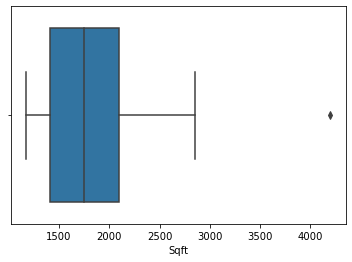

In [161]:
# Lets check for any outliers in the data and remove them if neccessary.. 
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Sqft'])

<AxesSubplot:xlabel='Price'>

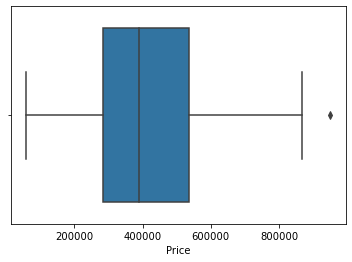

In [166]:
# Lets check for any outliers in the data and remove them if neccessary.. 
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Price'])

In [ ]:
# looks like there is a house priced over 900000k and a house with over 4000 sqft that are both outliers. 
# we could do 

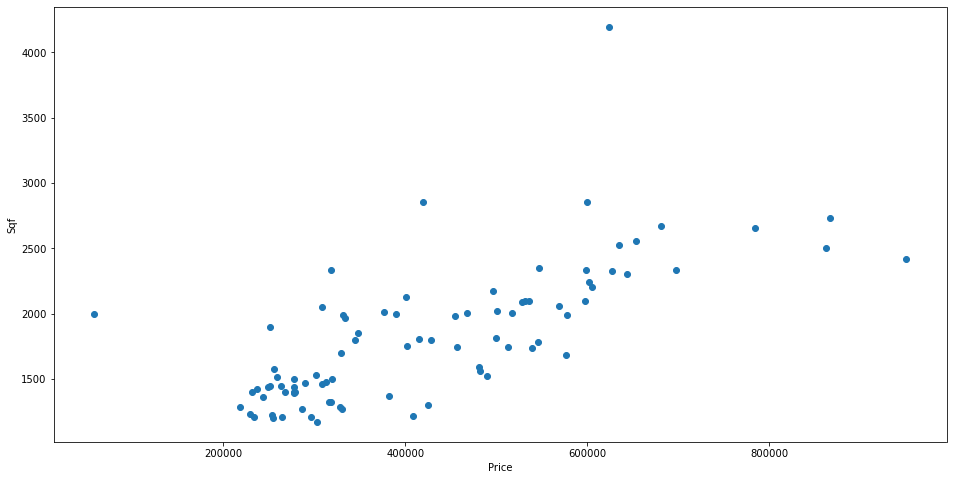

In [162]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Price'], df['Sqft'])
ax.set_xlabel('Price')
ax.set_ylabel('Sqf')
plt.show()

In [172]:

# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

data_mean, data_std = mean(df), std(df)
data_mean

Beds          3.183908
Bath          2.126437
Sqft       1823.068966
Price    423213.896552
dtype: float64

In [202]:
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
upper

Beds          4.976348
Bath          3.397163
Sqft       3357.395289
Price    929883.533877
dtype: float64

In [207]:
# Remove those 2 outliers.. 
dfnew = df[df["Sqft"] <= upper[2]] # remove the sqft outlier
dffinal =  dfnew[dfnew["Price"] <= upper[3]] # remove the price outlier
dffinal

,Address,Beds,Bath,Sqft,Price
0,401 Mohawk Pkwy Cape Coral FL,3,2,2332,318100
1,402 Mohawk Pkwy Cape Coral FL,3,2,1575,255700
2,408 Mohawk Pkwy Cape Coral FL,3,2,2006,517400
3,409 Mohawk Pkwy Cape Coral FL,3,2,1993,331600
4,412 Mohawk Pkwy Cape Coral FL,3,2,1751,402200
...,...,...,...,...,...
81,1427 Mohawk Pkwy Cape Coral FL,3,2,1400,268300
82,1503 Mohawk Pkwy Cape Coral FL,3,2,1464,308600
83,1507 Mohawk Pkwy Cape Coral FL,3,2,1448,263800
84,1511 Mohawk Pkwy Cape Coral FL,3,2,1226,253300


In [215]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Split into Y Dependent and X independent variables 
X = dffinal[["Beds","Bath","Sqft"]]
Y = dffinal[["Price"]]

# Split into train and test split with test size only 20% of the data
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.20)

# make linear regression model
multiplelinear = LinearRegression()

#Fitting model with trainig data
multiplelinear.fit(x_train, y_train)

# lets use the test data now to predict the accuracy of the model on the untouched data
multiplelinear.predict(x_test)
multiplelinear.score(x_test,y_test)


0.6135224347408712

In [216]:
# Lets try gradient boosting regressor 
from sklearn.ensemble import GradientBoostingRegressor
boost = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
boost.score(x_train, y_train)
boost.score(x_test, y_test)


0.6193851652733604

In [217]:
# Lets now try random forest regressor. 
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=0).fit(x_train, y_train)
forest.score(x_train, y_train)
forest.score(x_test, y_test)

0.6729958959459745

In [218]:
# Suppose we built a 3 bed 3 bath for 2000 sqft what would the estimated value be.. 
data = [{'Beds':3,'Bath':3,'Sqft':2000}]
random = pd.DataFrame(data)
pred = regressor.predict(random)
pred

array([[537048.60113393]])

In [219]:
# Gradient prediction
pred1 = boost.predict(random)
pred1

array([390017.57815689])

In [220]:
# Forest prediction
pred2 = forest.predict(random)
pred2

array([381954.])

# Make ML model using pickle and this example I found online 


In [229]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

dataset = pd.read_csv('hiring.csv')

dataset['experience'].fillna(0, inplace=True)

dataset['test_score'].fillna(dataset['test_score'].mean(), inplace=True)
dataset

,experience,test_score,interview_score,salary
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [230]:
# Filter minus the salary only independent variables 
X = dataset.iloc[:, :3]
X

,experience,test_score,interview_score
0,0,8.000000,9
1,0,8.000000,6
2,five,6.000000,7
3,two,10.000000,10
4,seven,9.000000,6
5,three,7.000000,10
6,ten,7.857143,7
7,eleven,7.000000,8


In [231]:
#Converting words to integer values
def convert_to_int(word):
    word_dict = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8,
                'nine':9, 'ten':10, 'eleven':11, 'twelve':12, 'zero':0, 0: 0}
    return word_dict[word]

X['experience'] = X['experience'].apply(lambda x : convert_to_int(x))



In [233]:
y = dataset.iloc[:, -1]
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary, dtype: int64

In [234]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Fitting model with trainig data
regressor.fit(X, y)

# Saving model to disk
pickle.dump(regressor, open('model.pkl','wb'))

In [235]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[2, 9, 6]]))

[53290.89255945]


# Make ML Model Storing in Pickle format with the housing data

In [236]:
df = pd.read_csv("regressiondata.csv")

data_mean, data_std = mean(df), std(df)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# Remove those 2 outliers.. 
dfnew = df[df["Sqft"] <= upper[2]] # remove the sqft outlier
dffinal =  dfnew[dfnew["Price"] <= upper[3]] # remove the price outlie

In [245]:
Y= dffinal.iloc[:, -1]
Y

0     318100
1     255700
2     517400
3     331600
4     402200
       ...  
81    268300
82    308600
83    263800
84    253300
85    496500
Name: Price, Length: 85, dtype: int64

In [246]:
X = dffinal.iloc[:, 1:4]
X

,Beds,Bath,Sqft
0,3,2,2332
1,3,2,1575
2,3,2,2006
3,3,2,1993
4,3,2,1751
...,...,...,...
81,3,2,1400
82,3,2,1464
83,3,2,1448
84,3,2,1226


In [247]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Fitting model with trainig data
regressor.fit(X, Y)

# Saving model to disk
pickle.dump(regressor, open('model.pkl','wb'))

In [248]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[3, 2, 2400]]))

[560910.12145982]
